In [45]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
import api_keys
from ratelimit import limits, sleep_and_retry

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#Covert List to Pandas Series
citys=pd.Series(cities)
long=pd.Series(lngs)
lat=pd.Series(lats)

#Data Frame Pandas Series and Add new colums to 
city_data=pd.DataFrame({'city':citys,'Latitude':lat,'Longitude':long})
city_data["Temperature"] = ""
city_data["Humidity"] = ""
city_data["Cloudiness"] = ""
city_data["WindSpeed"] = ""

In [19]:
city_data=city_data.head(500)
city_data.head()

,city,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
0,khatanga,70.919122,107.311275,,,,
1,tuktoyaktuk,85.901645,-119.257225,,,,
2,punta arenas,-81.276203,-95.026072,,,,
3,nowy tomysl,52.452988,16.101947,,,,
4,hermanus,-79.998824,-1.778475,,,,


## Perform API Calls

In [20]:
# OpenWeatherMap API Key
api_key = '8ee9bbd7f7ed6ddeb74857dbb1b6c841'
#api_key = api_keys.api_key

# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&params&APPID={api_key}"  
#lat={lat}&lon={lon}


# Build partial query URL
#query_url = f"{url}+{params}"


In [21]:
one_MINUTE = 60

@sleep_and_retry
@limits(calls=600, period=one_MINUTE)

def call_api(url2):
    
    response = requests.get(url2)
    todos = json.loads(response.text)
    if response.status_code != 200:
        raise Exception('API response: {}'.format(response.status_code))
    
    return todos 

In [22]:

for index, row in city_data.iterrows():
    # get lat, lng from df
    # change location each iteration while leaving original params in place
    cit=row['city']
    lat= row["Latitude"]
    lon=row['Longitude']
    # Use the search term: "International Airport" and our lat/lng
   
    params= f"lat={lat}&lon={lon}"
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&{params}&APPID={api_key}"  
    # make request and print url
    response=call_api(url)
    
#     print the name_address url, avoid doing for public github repos in order to avoid exposing key
#     print(url)

    # convert to json
    response2 = json.dumps(call_api(url))
    # print(json.dumps(name_address, indent=4, sort_keys=True))
    time.sleep(1)
    # Since some data may be missing we incorporate a try-except to skip any that are missing a data point.
    try:
        city_data.loc[index, "Temperature"] = response['main']['temp_max']
        city_data.loc[index, "Humidity"] =response['main']['humidity']
        city_data.loc[index, "Cloudiness"] = response['clouds']['all']
        city_data.loc[index, "WindSpeed"] =response['wind']['speed']
        print(f'found data upating table')
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")



found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table


found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table
found data upating table


ConnectionError: ('Connection aborted.', TimeoutError(10060, 'A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond', None, 10060, None))

In [42]:
city_data.head()


,city,Latitude,Longitude,Temperature,Humidity,Cloudiness,WindSpeed
0,khatanga,70.919122,107.311275,38.37,96,92,12.64
1,tuktoyaktuk,85.901645,-119.257225,24.78,93,88,11.52
2,punta arenas,-81.276203,-95.026072,-17.35,38,36,22.48
3,nowy tomysl,52.452988,16.101947,57.2,100,0,2.24
4,hermanus,-79.998824,-1.778475,-60.73,0,0,16.22


In [49]:
city_data=city_data.dropna(axis=0,how='any')
city_data.Temperature=pd.to_numeric(city_data.Temperature)
city_data.Latitude=pd.to_numeric(city_data.Latitude)

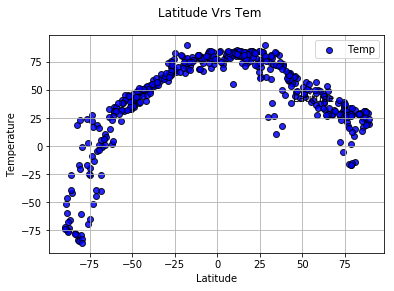

<Figure size 432x288 with 0 Axes>

In [50]:
plt.suptitle(f'Latitude Vrs Tem ')
plt.scatter(city_data['Latitude'],city_data['Temperature'],alpha=0.85,c='blue',edgecolor = 'black', label = 'Temp')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.text(43,40," Latitude.")
plt.legend()
plt.grid()
plt.show()

plt.savefig('Temp.png')

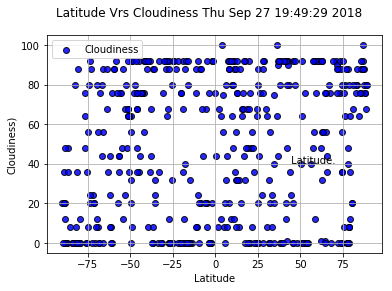

<Figure size 432x288 with 0 Axes>

In [51]:
plt.suptitle(f'Latitude Vrs Cloudiness {time.ctime()}')
plt.scatter(city_data['Latitude'],city_data['Cloudiness'],alpha=0.85,c='blue',edgecolor = 'black', label = 'Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness)')
plt.text(43,40," Latitude.")
plt.legend()
plt.grid()
plt.show()

plt.savefig('Cloudiness.png')

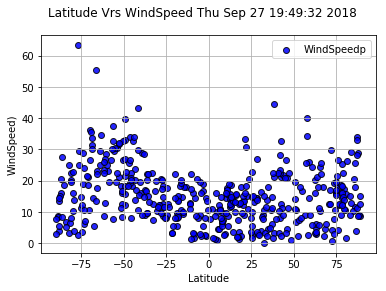

<Figure size 432x288 with 0 Axes>

In [52]:
plt.suptitle(f'Latitude Vrs WindSpeed {time.ctime()}')
plt.scatter(city_data['Latitude'],city_data['WindSpeed'],alpha=0.85,c='blue',edgecolor = 'black', label = 'WindSpeedp')
plt.xlabel('Latitude')
plt.ylabel('WindSpeed)')
#plt.text(20,40,"Latitude.")
plt.legend()
plt.grid()
plt.show()
plt.savefig('WindSpeed.png')